# Module 3 Project Part 3

## Naive Bayes

Naive Bayes is a classification algorithm that predicts the category of the data based on a probability, using Bayes' Theorem. Bayes' Theorem is used to classify probabilities of different classes given the features in the dataset, and assumes that each feature contributes to the predictions with no relation to each other (i.e. all features are independent). It is commonly used in real world classification problems such as spam filtering or sentiment analysis. 

Multinomial Naive Bayes is commonly used for text classification problems, and refers to how many times a word appears or how often a category occurs. Multinomial Naive Bayes first extracts all unique words from the training data and separates word frequencies by class. It then applies the mulitnomial Naive Bayes formula, and makes a final classification depending on the probability output. 

Bernoulli Naive Bayes follows a similar procedure, but classifies features based on binary features instead. Each word is represented using binary features indicating the presence or absence of a word. The binary features are put into a binary feature matrix, and word probabilities are computed similarly to the multinomial computation. For example, while multinomial Naive Bayes could be used to predict whether a document is spam based on the word coutns, Bernoulli Naive Bayes classifies a document as spam or not based on word presence. 

### Data Prep

In [21]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report


In [7]:
# Load in data
climate_daily = pd.read_csv("fires_climate_daily.csv")
treecover_yearly = pd.read_csv("fires_treecover_yearly.csv")
fires_yearly = pd.read_csv("fires_yearly.csv")

In [8]:
# Using daily climate info for Naive Bayes
climate_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acq_date               2465 non-null   object 
 1   fire_count             2465 non-null   int64  
 2   mean_frp               2465 non-null   float64
 3   soil_temp_level_1      11 non-null     float64
 4   soil_moisture_level_1  11 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 96.4+ KB


In [9]:
# Derive a target variable for fire risk
climate_daily["fire_risk"] = pd.cut(climate_daily["fire_count"], bins=[0,10,50, float("inf")],
                                     labels=["low", "medium", "high"])

In [10]:
# Convert data to numeric format
climate_daily['acq_date'] = pd.to_datetime(climate_daily['acq_date'])
climate_daily['day_of_year'] = climate_daily['acq_date'].dt.dayofyear

X = climate_daily[['day_of_year', 'fire_count', 'mean_frp']]
y = climate_daily['fire_risk']

### Naive Bayes Classifier Implementation

In [11]:
# Drop rows with missing target values
climate_daily = climate_daily.dropna(subset=['fire_risk'])

# Scale and train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Number of instances with 1 target variable for training set
display(y_train.value_counts())

# Number of instances with one target variable for test set
display(y_test.value_counts())

fire_risk
low       1191
medium     511
high       270
Name: count, dtype: int64

fire_risk
low       300
medium    133
high       60
Name: count, dtype: int64

In [13]:
# Scale features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

### Results

In [22]:
# Train Naive Bayes classifier
classifier = GaussianNB() 

classifier.fit(X_train, y_train) 

preds = classifier.predict(sc.transform(X_test))

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

        high       0.88      1.00      0.94        60
         low       0.97      0.98      0.98       300
      medium       0.98      0.89      0.93       133

    accuracy                           0.96       493
   macro avg       0.94      0.96      0.95       493
weighted avg       0.96      0.96      0.96       493



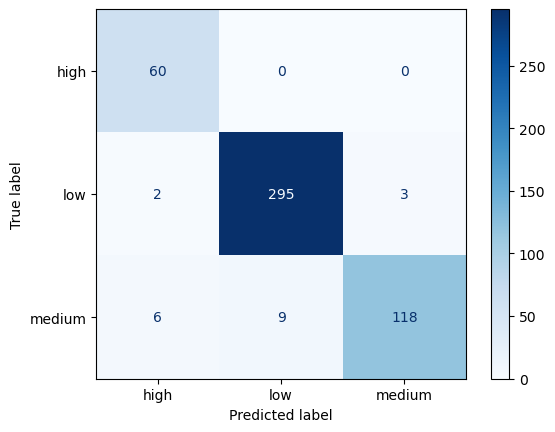

In [16]:
# Create the Confusion matrix

cm = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)

### Conclusion

## Desicion Trees